In this file we will expolore our dataset from "Students" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets and print sheet names
xls = pd.ExcelFile('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data.xlsx')
xls.sheet_names



['Classroom Activities Question',
 'Coursework Question',
 'Most Imp Skills',
 'Skills to develop',
 'What made job interesting',
 'Learn & Focus on']

In [3]:
df = xls.parse('Most Imp Skills')
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Co-op #,Citizenship Status,What are the most important skills you used on co-op?
0,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,"Excel, communication, professionalism, data an..."
1,29,201415-201425,SR,B,ACCT,4COP,NaN,Only,US Citizen,"- Microsoft office (Excel, Word, PowerPoint)_x..."
2,55,201415-201425,JR,B,ACCT,5COP,NaN,Third,US Citizen,"Networking, time management, organization."
3,61,201425-201425,JR,B,BAE,5COP,NaN,Second,Non US Citizen,English itself was a major factor as I was in ...
4,60,201415-201415,JR,B,BAE,5COP,NaN,Second,Non US Citizen,English translation skills itself was one of t...
...,...,...,...,...,...,...,...,...,...,...
1424,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,During Co-op I had the chance to negotiate wit...
1425,5922,201435-201435,JR,B,MKTG,5COP,NaN,First,Non US Citizen,Working with different personality types.
1426,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Communication. Mainly communication through em...
1427,5938,201435-201445,PJ,B,GBUS,4COP,NaN,Only,US Citizen,Communication. I did not have a specific skill...


In [4]:
# So we have 1436 rows and 10 columns in our dataset.

In [5]:
df.shape

(1429, 10)

In [6]:
# Checking for missing values in columns
df.isnull().sum()

Respondent ID                                               0
Work Terms                                                  0
Class (BOT)                                                 0
College Code                                                0
Major Code                                                  0
Coop Conc                                                   0
Major Conc                                               1398
Co-op #                                                     0
Citizenship Status                                          0
What are the most important skills you used on co-op?       3
dtype: int64

In [7]:
# We have 1375 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


# Delete rows with missing values

In [8]:
df = df.dropna(subset=["What are the most important skills you used on co-op?"])

In [9]:
# This is how our target text data looks like. 708 rows of valid data left
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What are the most important skills you used on co-op?
0,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,"Excel, communication, professionalism, data an..."
1,29,201415-201425,SR,B,ACCT,4COP,Only,US Citizen,"- Microsoft office (Excel, Word, PowerPoint)_x..."
2,55,201415-201425,JR,B,ACCT,5COP,Third,US Citizen,"Networking, time management, organization."
3,61,201425-201425,JR,B,BAE,5COP,Second,Non US Citizen,English itself was a major factor as I was in ...
4,60,201415-201415,JR,B,BAE,5COP,Second,Non US Citizen,English translation skills itself was one of t...
...,...,...,...,...,...,...,...,...,...
1424,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,During Co-op I had the chance to negotiate wit...
1425,5922,201435-201435,JR,B,MKTG,5COP,First,Non US Citizen,Working with different personality types.
1426,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Communication. Mainly communication through em...
1427,5938,201435-201445,PJ,B,GBUS,4COP,Only,US Citizen,Communication. I did not have a specific skill...


In [10]:
#check for missiing values
df.isnull().sum()

Respondent ID                                            0
Work Terms                                               0
Class (BOT)                                              0
College Code                                             0
Major Code                                               0
Coop Conc                                                0
Co-op #                                                  0
Citizenship Status                                       0
What are the most important skills you used on co-op?    0
dtype: int64

In [11]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [12]:
import contractions

In [13]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [14]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [15]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [16]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [17]:
df["processed"] = df["What are the most important skills you used on co-op?"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What are the most important skills you used on co-op?,processed
983,2317,201435-201445,SR,B,FIN,4COP,Only,Non US Citizen,Excel Skills,Excel Skills
227,3298,201415-201425,SO,B,FIN,5COP,First,US Citizen,I feel the most important skills I used on Co-...,I feel the most important skills I used on Co-...
1083,3075,201435-201445,PJ,B,GBUS,5COP,First,US Citizen,Some important skills that I used on co op wer...,Some important skills that I used on co op wer...
487,4956,201425-201435,JR,B,ACCT,5COP,Third,US Citizen,Tax knowledge and knowledge of financial state...,Tax knowledge and knowledge of financial statt...
1019,2634,201435-201445,PJ,B,INT1,5COP,First,US Citizen,Communication skills were by far the most impo...,Communication skills were by far the most impo...
237,3364,201415-201425,SO,B,BAE,5COP,First,US Citizen,Most important skill would be organization bec...,Most important skill would be organization bec...
157,2664,201415-201425,SO,B,INT1,5COP,First,US Citizen,Important marketing and selling skills to be s...,Important marcheting and selling skills to be ...
588,5626,201415-201425,PJ,B,MKTG,5COP,Second,US Citizen,The most important skills I used would have to...,The most important skills I used would have to...
1389,5651,201435-201445,SR,B,MKTG,5COP,Third,Non US Citizen,"Communication, data analysis, time management","Communication, data analysis, time managthement"
219,3256,201415-201425,SO,B,GBUS,5COP,First,US Citizen,"Time management, teamwork, leadership, conflic...","Time managthement, teamwork, leadership, confl..."


# Lowercase the text

In [18]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [19]:
#checking results
df["processed"]

0       excel, communication, professionalism, data an...
1       - microsoft office (excel, word, powerpoint)_x...
2            networking, time managthement, organization.
3       english itself was a major factor as i was in ...
4       english translation skills itself was one of t...
                              ...                        
1424    during co-op i had the chance to negotiate wit...
1425            working with different personality types.
1426    communication. mainly communication through th...
1427    communication. i did not have a specific skill...
1428    excel, computer skill to use on sunguard systthem
Name: processed, Length: 1426, dtype: object

# Remove all digits

In [20]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
#checking results
df["processed"]

0       excel, communication, professionalism, data an...
1       - microsoft office (excel, word, powerpoint)\n...
2            networking, time managthement, organization.
3       english itself was a major factor as i was in ...
4       english translation skills itself was one of t...
                              ...                        
1424    during co-op i had the chance to negotiate wit...
1425            working with different personality types.
1426    communication. mainly communication through th...
1427    communication. i did not have a specific skill...
1428    excel, computer skill to use on sunguard systthem
Name: processed, Length: 1426, dtype: object

## Remove special characters

In [21]:
df['processed']=df['processed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))

In [22]:
df["processed"]

0       excel communication professionalism data analy...
1        microsoft office excel word powerpoint market...
2              networking time managthement organization 
3       english itself was a major factor as i was in ...
4       english translation skills itself was one of t...
                              ...                        
1424    during co op i had the chance to negotiate wit...
1425            working with different personality types 
1426    communication mainly communication through the...
1427    communication i did not have a specific skill ...
1428     excel computer skill to use on sunguard systthem
Name: processed, Length: 1426, dtype: object

## Unnecessary words

# Removing punctuations

In [23]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [24]:
#Checking the results
df['processed'].sample(10)

1166            computer skills and communication skills 
1114    i learned how to communicate professionally wi...
1003    being able to interact professionally with cel...
499                                         all of ththem
1277    communications skills is by far the most impor...
1130    the most important skills i used during co op ...
649           communication skills and networking skills 
395     i think that my organizational and communicati...
212     being able to communicate with clients and pro...
599     the most important skills i used this co op we...
Name: processed, dtype: object

# Removing extra spaces between words

In [25]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [26]:
# Checking results
df["processed"].sample(10)

826      time managthement skills organisational skill...
707                                                      
610     this co op required a great deal of attention ...
1245    organization people skills excel process manag...
285                             critical reasoning skills
145     my communications skills both via technology a...
299     attention to detail analysis and pattern recog...
1189    communication skills analytical skills project...
996     the most important skill i used on co op was m...
929     the most important skills i used on co op were...
Name: processed, dtype: object

# Removing Stop words

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [28]:
txt = df['processed'].values[0]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : excel False excel
2 : communication False communication
3 : professionalism False professionalism
4 : data False datum
5 : analysis False analysis


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [29]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(token.lemma_))
    return " ".join([word for word in ans])

In [30]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))


In [31]:
# Checking the results
df.sample(15)["lemmatized"]

773                              work quickly efficiently
757     skill leverage co op include critical thinking...
424     think data mining skill important skill requir...
1243                                                  yes
76                      important skill co op excel skill
584     time managthement project managthement communi...
1299    probably people skill need communicate supervi...
577                    attention decision problthem solve
1074                                                excel
175     important skill co op ability communicate work...
280                      excel function class basic skill
685     important skill co op communication skill orde...
1212                                  communication skill
608                                  excel accounting tax
1186                                        communication
Name: lemmatized, dtype: object

In [32]:
# Checking results
print("Edited >>:", df.loc[478, "lemmatized"])
print("Unedited >>:", df.loc[478, "processed"])


Edited >>: problthem solve skill detail orient
Unedited >>: problthem solving skills and being detail oriented


# Vectorize preprocessed data

## N-gram (n=1)

In [33]:
# Here we will create Words frequency matrix (One-word) 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm_1 = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm_1.index=df.index
df_dtm_1.head(3)

,ability,able,absolutely,acadthemic,acce,accelerated,accept,access,accomplish,accordingly,...,write,writing,wrong,year,yell,yes,yield,young,zoho,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram (n=2)

In [34]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability ability,ability able,ability accept,ability adapt,ability analysis,ability analyze,ability answer,ability attention,ability balance,ability big,...,year professor,year return,year school,yell phone,yield great,young project,young smarche,zoho crm,zone diligent,zone piece
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [35]:
from wordcloud import WordCloud
from textwrap import wrap

## Word Cloud One-word

In [36]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

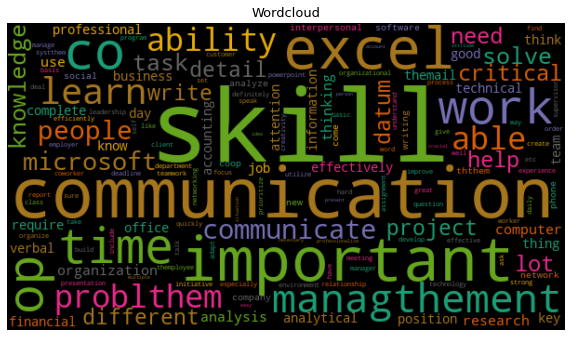

In [37]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart One-word

## Removing unnecessary words

In [59]:
word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:30].to_dict()



word_freqs_1
banned = ["co", "lot", "op", "datum", "need", "help", "able", "important", "ability","skill"]

for keys in word_freqs_1.copy():
    if keys in banned:
        del word_freqs_1[keys]


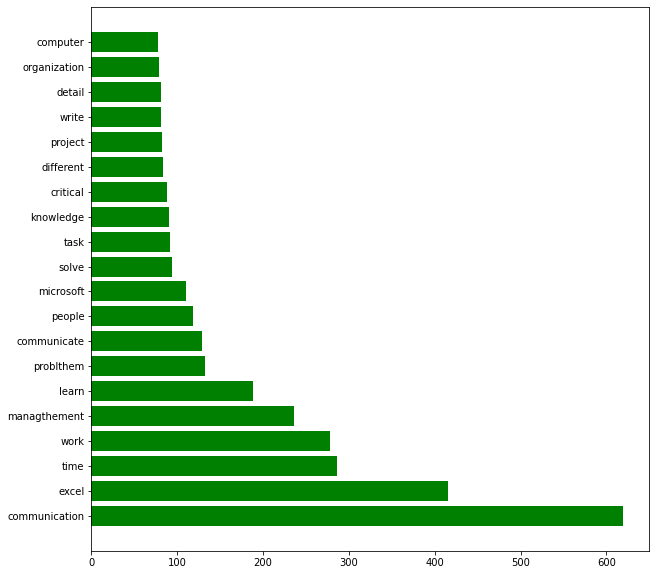

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)
plt.show()

## Word Cloud two-word

In [72]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

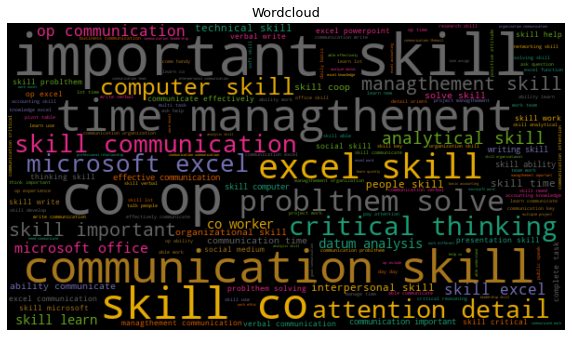

In [73]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

In [74]:
df_dtm.head()

,ability,able,absolutely,acadthemic,acce,accelerated,accept,access,accomplish,accordingly,...,write,writing,wrong,year,yell,yes,yield,young,zoho,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word frequency bar chart Two-word

In [68]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:25].to_dict()


word_freqs_2

{'important skill': 332,
 'co op': 291,
 'communication skill': 198,
 'time managthement': 187,
 'skill co': 182,
 'excel skill': 103,
 'problthem solve': 83,
 'critical thinking': 61,
 'attention detail': 55,
 'skill communication': 50,
 'microsoft excel': 49,
 'computer skill': 46,
 'managthement skill': 42,
 'skill important': 41,
 'op communication': 39,
 'analytical skill': 39,
 'skill excel': 38,
 'microsoft office': 33,
 'skill learn': 30,
 'datum analysis': 28,
 'co worker': 27,
 'interpersonal skill': 26,
 'skill time': 25,
 'technical skill': 25,
 'people skill': 23}

In [69]:
word_freqs_1
banned = ["important skill", "co op", "skill co", "skill important", "op communication", "datum analysis", "co worker", "people skill", "ability","skill"]

for keys in word_freqs_2.copy():
    if keys in banned:
        del word_freqs_2[keys]

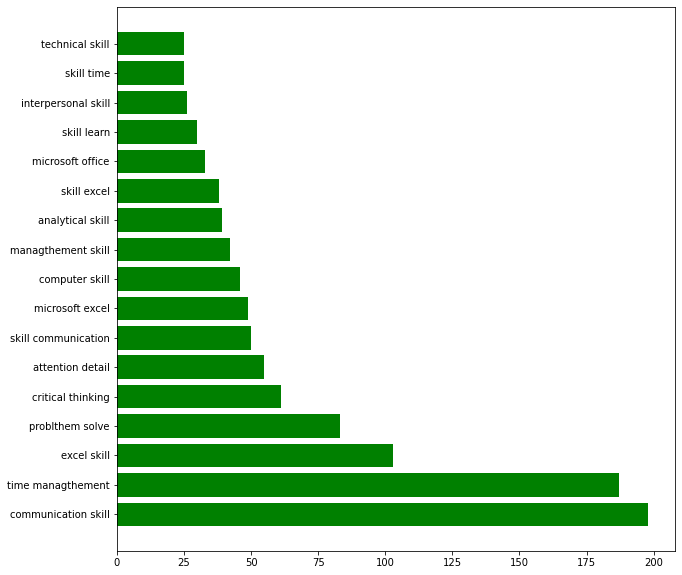

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_2)), word_freqs_2.values(),color='green')

plt.yticks(range(len(word_freqs_2)), word_freqs_2.keys())
plt.yticks(rotation = 0)
plt.show()